In [132]:
import pandas as pd
import numpy as np  
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.formula.api as sfa
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import math
from sklearn.metrics import r2_score
import random
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from collections import Counter
import scipy.stats as ss
import sklearn.preprocessing as sp
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
!pip install statsmodels
!pip3 install catboost
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.decomposition import PCA
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
cmap = sns.cm.mako_r
%matplotlib inline
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [133]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("aug_train.csv") 
df.head()

Saving aug_train.csv to aug_train (2).csv


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [135]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [136]:
(df.isnull().sum()/len(df))*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64

In [137]:
df.shape

(19158, 14)

In [138]:
df.size

268212

In [139]:
for col in df.columns:
    print(col, df[col].unique())

enrollee_id [ 8949 29725 11561 ... 24576  5756 23834]
city ['city_103' 'city_40' 'city_21' 'city_115' 'city_162' 'city_176'
 'city_160' 'city_46' 'city_61' 'city_114' 'city_13' 'city_159' 'city_102'
 'city_67' 'city_100' 'city_16' 'city_71' 'city_104' 'city_64' 'city_101'
 'city_83' 'city_105' 'city_73' 'city_75' 'city_41' 'city_11' 'city_93'
 'city_90' 'city_36' 'city_20' 'city_57' 'city_152' 'city_19' 'city_65'
 'city_74' 'city_173' 'city_136' 'city_98' 'city_97' 'city_50' 'city_138'
 'city_82' 'city_157' 'city_89' 'city_150' 'city_70' 'city_175' 'city_94'
 'city_28' 'city_59' 'city_165' 'city_145' 'city_142' 'city_26' 'city_12'
 'city_37' 'city_43' 'city_116' 'city_23' 'city_99' 'city_149' 'city_10'
 'city_45' 'city_80' 'city_128' 'city_158' 'city_123' 'city_7' 'city_72'
 'city_106' 'city_143' 'city_78' 'city_109' 'city_24' 'city_134' 'city_48'
 'city_144' 'city_91' 'city_146' 'city_133' 'city_126' 'city_118' 'city_9'
 'city_167' 'city_27' 'city_84' 'city_54' 'city_39' 'city_79' 'ci

Data Visualization

Which gender is more likely to move for a new job?

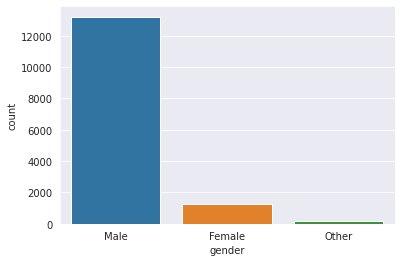

In [140]:
sns.countplot(df.gender)

In [141]:
genders = df[df['target'] == 1]['gender']
temp_df= (genders.value_counts())/len(genders)*100

In [142]:
temp_df

Male      63.052125
Female     6.824367
Other      1.046682
Name: gender, dtype: float64

Text(0.5, 1.0, 'Gender % looking for new job')

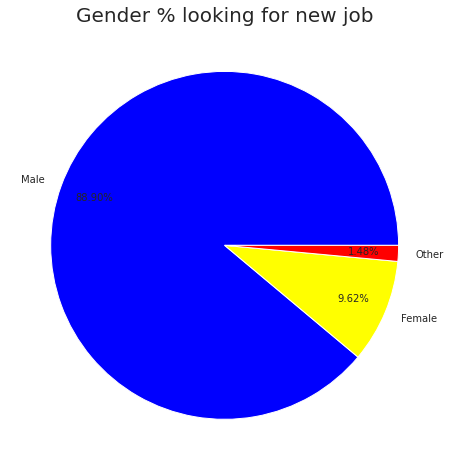

In [143]:
plt.figure(figsize=(8,8))
plt.pie(temp_df,labels = temp_df.keys() , colors = ['blue','yellow','red'], autopct="%.2f%%",pctdistance=0.8)
plt.title('Gender % looking for new job', fontsize=20)

In [144]:
male_newjob = df[(df['gender']=='Male') & df['target']==1]
female_newjob = df[(df['gender']=='Female') & df['target']==1]

# print
print('{} % of male who are looking for a new job'.format(len(male_newjob)/len(df['gender']=='Male')*100))
print('{} % of female who are looking for a new job'.format(len(female_newjob)/len(df['gender']=='Female')*100))

15.721891637958032 % of male who are looking for a new job
1.7016390019835057 % of female who are looking for a new job


From which company type people are looking for new job?

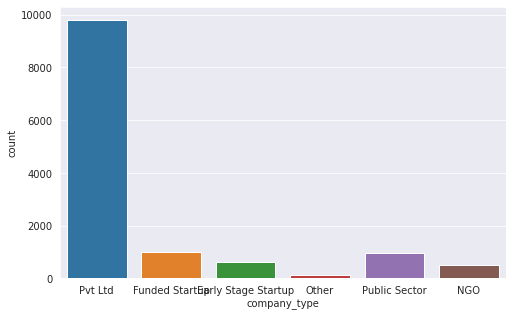

In [145]:
plt.figure(figsize=(8,5))
sns.countplot(df['company_type'])
plt.show()

here we can see that most of pvt sector employees are looking for job change

Text(0.5, 1.0, 'People leaving company')

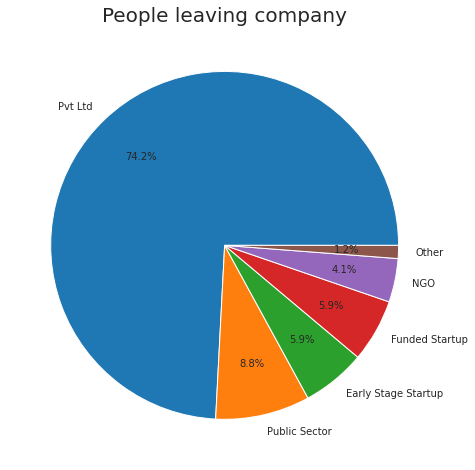

In [146]:
company_type = df[df['target'] == 1]['company_type']
temp = company_type.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = temp, labels = labels, autopct="%.1f%%",pctdistance=0.7)
plt.title('People leaving company', fontsize=20)

In [147]:
for i in df['company_type'].unique():
    company_newjob = df[(df['company_type']==i) & df['target']==1]
    print('{} % of {} who are looking for a new job'.format(len(company_newjob)/len(df['company_type']==i)*100,i))

0.0 % of nan who are looking for a new job
9.2650589831924 % of Pvt Ltd who are looking for a new job
0.7307652155757386 % of Funded Startup who are looking for a new job
0.741204718655392 % of Early Stage Startup who are looking for a new job
0.15137279465497444 % of Other who are looking for a new job
1.096147823363608 % of Public Sector who are looking for a new job
0.5063158993631903 % of NGO who are looking for a new job


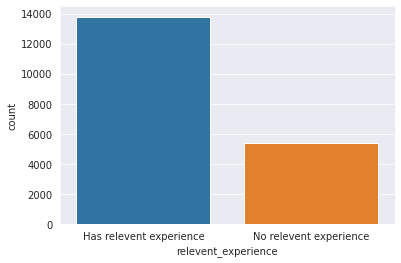

In [148]:
sns.countplot(df['relevent_experience'])

In [149]:
(df['relevent_experience']).value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

Text(0.5, 1.0, 'Relevent experience on the basis of target')

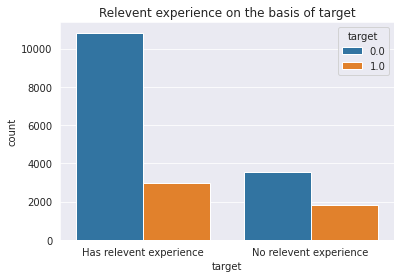

In [150]:
sns.countplot(df['relevent_experience'],hue=df['target'])
plt.xlabel('target')
plt.ylabel('count')
plt.title('Relevent experience on the basis of target')

In [151]:
yes_newjob = df[(df['relevent_experience']=='Has relevent experience') & df['target']==1]
no_newjob = df[(df['relevent_experience']=='No relevent experience') & df['target']==1]

# print
print('{} % of having relevant experience who are looking for a new job'.format(len(yes_newjob)/len(df['relevent_experience']=='Has relevent experience')*100))
print('{} % of not havinf relevant experience who are looking for a new job'.format(len(no_newjob)/len(df['relevent_experience']=='No relevent experience')*100))

15.45568430942687 % of having relevant experience who are looking for a new job
9.479068796325295 % of not havinf relevant experience who are looking for a new job


Did any people got into data science field without having graduation degree?

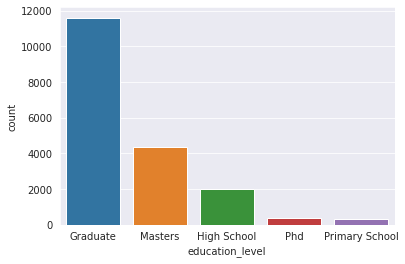

In [152]:
sns.countplot(df['education_level'])

In [153]:
df.education_level.value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [154]:
people_withoutdegree = df[(df['education_level'] == 'Primary School')& (df['education_level']=='High School') & (df['enrolled_university'] == "no_enrollment")]
print("People who have got into the data science world without graduation are", len(people_withoutdegree))

People who have got into the data science world without graduation are 0


So their is not a single person who get into this field without graduation.

**Years between last and current job**

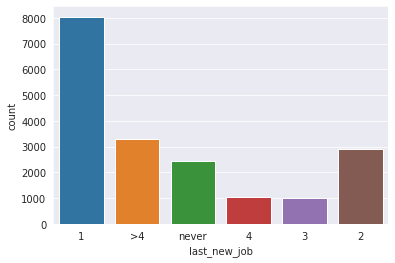

In [155]:
sns.countplot(df['last_new_job'])

**DATA PREPROCESSING**

First of all we are going to drop unnecessary columns,so we don't require enrollee_id and city column

In [156]:
df.drop(columns=["city","enrollee_id"],inplace=True)

In [157]:
df

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


Countplot for some categorical feature

We already have seen countplot for various features.Now,we are going to see countplot for the features we haven't seen yet

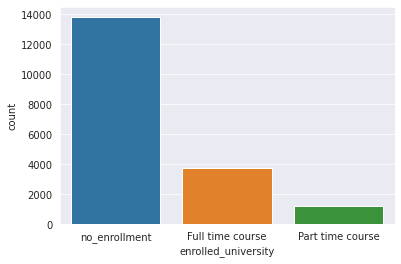

In [158]:
sns.countplot(df['enrolled_university'])

So it's seems like most people who are currently doing job haven't enrolled in any university

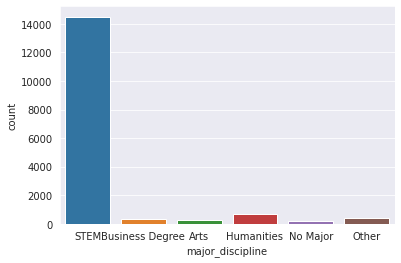

In [159]:
sns.countplot(df['major_discipline'])

Most of the Candidates are from STEM. That is their major discipline was in one of the Following:

Science
Technology
Engineering
Mathematics

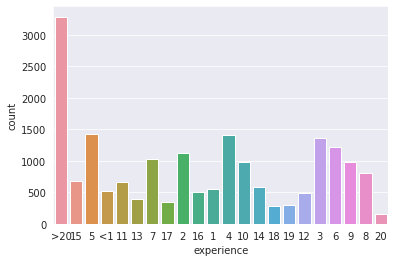

In [160]:
sns.countplot(df['experience'])

dealing with null values

In [161]:
# null value
percent_null = df.isnull().mean()*100
print(percent_null)

city_development_index     0.000000
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
last_new_job               2.207955
training_hours             0.000000
target                     0.000000
dtype: float64


Columns in which we have 2% or less than 2% null values we can drop those null values

In [162]:
df.dropna(subset=['enrolled_university','education_level','experience','last_new_job'], axis=0, inplace=True)

In [163]:
# after dropping those null values
df.shape

(18014, 12)

Now we are going to fill null values with their mode as all the columns left have dtype as 'object'

In [164]:
df.dtypes

city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object

In [165]:
col_mode = ['gender','company_size','major_discipline','company_type','relevent_experience']
for col in col_mode:
    df[col].fillna(df[col].mode()[0],inplace=True)

Let's change the dtype of experience and last_new_job column

In [166]:
df.replace(to_replace = 'Has relevent experience',value = 'Yes',inplace = True)
df.replace(to_replace = 'No relevent experience',value='No',inplace = True )

df.replace(to_replace = '<1',value = '0',inplace = True)
df.replace(to_replace = '>20',value = '21',inplace=True)
df.replace(to_replace = 'never',value = '0',inplace=True)
df.replace(to_replace = '>4',value = '5',inplace=True)

df.replace(to_replace = '<10',value = 'around_10',inplace=True)
df.replace(to_replace = '10/49',value = 'around_50',inplace=True)
df.replace(to_replace = '50-99',value = 'around_100',inplace=True)
df.replace(to_replace = '100-500',value = 'around_500',inplace=True)
df.replace(to_replace = '500-999',value = 'around_1000',inplace=True)
df.replace(to_replace = '1000-4999',value = 'around_5000',inplace=True)
df.replace(to_replace = '5000-9999',value = 'around_10000',inplace=True)
df.replace(to_replace = '10000+',value = 'more_than_10000',inplace=True)

df.replace(to_replace = 'Full time course',value = 'Full_time_course',inplace=True)
df.replace(to_replace = 'Part time course',value = 'Part_time_course',inplace=True)

df.replace(to_replace = 'Primary School',value = 'Primary_School',inplace=True)
df.replace(to_replace = 'High School',value = 'High_School',inplace=True)

df.replace(to_replace = 'Business Degree',value = 'Business_Degree',inplace=True)
df.replace(to_replace = 'No Major',value = 'No_Major',inplace=True)

df.replace(to_replace = 'Pvt Ltd',value = 'Pvt_Ltd',inplace=True)
df.replace(to_replace = 'Funded Startup',value = 'Funded_Startup',inplace=True)
df.replace(to_replace = 'Public Sector',value = 'Public_Sector',inplace=True)
df.replace(to_replace = 'Early Stage Startup',value = 'Early_Stage_Startup',inplace=True)

df['major_discipline'].replace('Other','Other_major',inplace=True)
df['company_type'].replace('Other','Other_type',inplace=True)

In [167]:
df = df.astype({'experience':int,'last_new_job':int})

Handling Categorical Values

In [168]:
# get dummies

education_df = pd.get_dummies(df[['education_level']],drop_first=True,prefix=[None])
company_size_df = pd.get_dummies(df[['company_size']],drop_first=True,prefix=[None])
company_type_df = pd.get_dummies(df[['company_type']],drop_first=True,prefix=[None])
major_df = pd.get_dummies(df[['major_discipline']],drop_first=True,prefix=[None])
university_df = pd.get_dummies(df[['enrolled_university']],drop_first=True,prefix=[None])
experience_df = pd.get_dummies(df[['relevent_experience']],drop_first=True,prefix=[None])
gender_df = pd.get_dummies(df[['gender']],drop_first=True,prefix=[None])

In [169]:
# drop original columns
df.drop(['education_level','company_size','company_type','major_discipline','enrolled_university','relevent_experience','gender'],axis=1,inplace=True)

In [170]:
final_df = pd.concat([df,education_df,company_size_df,company_type_df,major_df,university_df,experience_df,gender_df],axis=1)

In [171]:
final_df.head(5)

,city_development_index,experience,last_new_job,training_hours,target,High_School,Masters,Phd,Primary_School,around_100,around_1000,around_10000,around_50,around_500,around_5000,more_than_10000,Funded_Startup,NGO,Other_type,Public_Sector,Pvt_Ltd,Business_Degree,Humanities,No_Major,Other_major,STEM,Part_time_course,no_enrollment,Yes,Male,Other
0,0.920,21,1,36,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0
1,0.776,15,5,47,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0
2,0.624,5,0,83,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0.767,21,4,8,0.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0
5,0.764,11,1,24,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,1,0


In [172]:
final_df.to_csv('final_df.csv')

In [173]:
X = final_df.drop(['target'], axis = 1)
Y = final_df['target']

**correlation**

In [174]:
X.corr()

,city_development_index,experience,last_new_job,training_hours,High_School,Masters,Phd,Primary_School,around_100,around_1000,around_10000,around_50,around_500,around_5000,more_than_10000,Funded_Startup,NGO,Other_type,Public_Sector,Pvt_Ltd,Business_Degree,Humanities,No_Major,Other_major,STEM,Part_time_course,no_enrollment,Yes,Male,Other
city_development_index,1.000000,0.330516,0.188412,0.002648,0.009820,0.027950,0.066337,0.026310,-0.066454,0.010563,0.029160,-0.031628,0.018287,0.062031,0.045635,0.031597,0.022471,0.015020,0.061233,-0.046223,0.034659,0.086909,0.018546,0.001893,-0.102450,-0.020924,0.160182,0.058426,-0.044861,0.032280
experience,0.330516,1.000000,0.475681,0.001900,-0.186970,0.154977,0.142408,-0.095175,-0.125080,0.033003,0.035951,-0.031922,0.055016,0.079395,0.068033,0.016353,0.007087,0.006607,0.015746,0.001577,0.014381,0.002968,0.013563,0.004972,-0.017059,-0.084898,0.340172,0.326847,0.045353,-0.016575
last_new_job,0.188412,0.475681,1.000000,-0.003823,-0.158639,0.084206,0.079211,-0.107812,-0.157063,0.035970,0.043618,-0.001240,0.057748,0.075865,0.085243,-0.044698,0.018524,0.016723,0.048541,0.013270,0.027905,0.035083,0.015188,0.011161,-0.049707,-0.028438,0.234568,0.232911,0.013174,-0.008024
training_hours,0.002648,0.001900,-0.003823,1.000000,0.010009,-0.018920,0.007255,-0.005787,0.009046,-0.002536,-0.003720,0.008579,-0.011130,-0.001629,-0.005544,0.007389,0.004755,0.004317,-0.010887,-0.006312,0.002693,0.001141,-0.003023,-0.000221,0.002941,0.007558,0.001368,0.015420,0.001776,-0.007631
High_School,0.009820,-0.186970,-0.158639,0.010009,1.000000,-0.190609,-0.051801,-0.044104,0.149562,-0.043217,-0.028942,-0.024067,-0.062268,-0.041246,-0.067152,-0.040876,-0.027408,-0.002445,-0.027644,0.058788,-0.046434,-0.066752,-0.037560,-0.049428,0.114644,0.028274,-0.205382,-0.259931,0.033965,0.025297
Masters,0.027950,0.154977,0.084206,-0.018920,-0.190609,1.000000,-0.083348,-0.070962,-0.073255,0.019308,0.008273,-0.019697,0.028962,0.044377,0.049606,-0.002222,0.022841,-0.007857,0.044778,-0.037341,0.009317,0.046067,-0.027641,0.008906,-0.019992,-0.036276,0.107376,0.113061,-0.016425,-0.018271
Phd,0.066337,0.142408,0.079211,0.007255,-0.051801,-0.083348,1.000000,-0.019285,-0.040844,0.000427,0.026486,-0.008295,0.012039,0.030229,0.026019,0.002341,0.050344,-0.007254,0.126974,-0.093538,-0.014610,0.015209,-0.016424,-0.000167,0.006098,-0.022304,0.059710,-0.036758,-0.024765,-0.010953
Primary_School,0.026310,-0.095175,-0.107812,-0.005787,-0.044104,-0.070962,-0.019285,1.000000,0.099478,-0.026382,-0.017413,-0.025574,-0.037184,-0.026906,-0.037760,-0.017029,-0.016290,-0.004673,-0.021556,0.034555,-0.017287,-0.024851,-0.013983,-0.018402,0.042681,-0.015427,0.035556,-0.148240,0.020332,0.014472
around_100,-0.066454,-0.125080,-0.157063,0.009046,0.149562,-0.073255,-0.040844,0.099478,1.000000,-0.204406,-0.162079,-0.266511,-0.367949,-0.254723,-0.321908,-0.033024,-0.089023,-0.038316,-0.096136,0.168296,-0.003908,0.005113,-0.001249,0.010368,-0.007469,-0.018169,-0.171015,-0.273746,0.004323,0.017905
around_1000,0.010563,0.033003,0.035970,-0.002536,-0.043217,0.019308,0.000427,-0.026382,-0.204406,1.000000,-0.039122,-0.064330,-0.088814,-0.061484,-0.077701,0.009454,0.019940,0.015344,0.050382,-0.030005,-0.004236,0.001819,-0.009649,-0.007669,0.003138,-0.008612,0.039143,0.059117,-0.002131,-0.008428


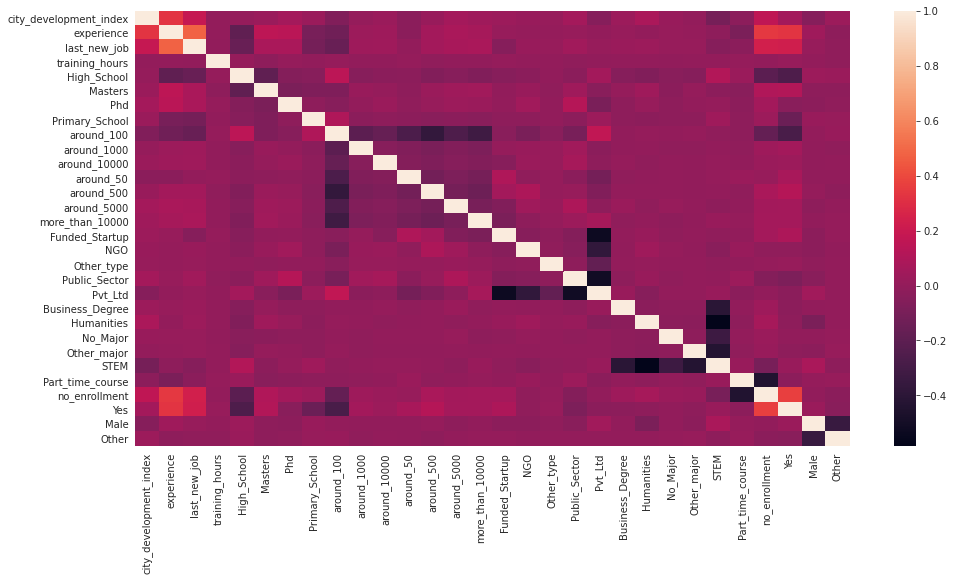

In [175]:
plt.figure(figsize=(16,8))
sns.heatmap(X.corr())

check multicolineartiy

In [176]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [177]:
calculate_vif_(X)

dropping 'city_development_index' at index: 0
dropping 'STEM' at index: 23
dropping 'Pvt_Ltd' at index: 18
dropping 'Male' at index: 25
dropping 'no_enrollment' at index: 23
Remaining variables:
Index(['experience', 'last_new_job', 'training_hours', 'High_School',
       'Masters', 'Phd', 'Primary_School', 'around_100', 'around_1000',
       'around_10000', 'around_50', 'around_500', 'around_5000',
       'more_than_10000', 'Funded_Startup', 'NGO', 'Other_type',
       'Public_Sector', 'Business_Degree', 'Humanities', 'No_Major',
       'Other_major', 'Part_time_course', 'Yes', 'Other'],
      dtype='object')


,experience,last_new_job,training_hours,High_School,Masters,Phd,Primary_School,around_100,around_1000,around_10000,around_50,around_500,around_5000,more_than_10000,Funded_Startup,NGO,Other_type,Public_Sector,Business_Degree,Humanities,No_Major,Other_major,Part_time_course,Yes,Other
0,21,1,36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,15,5,47,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5,0,83,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,21,4,8,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
5,11,1,24,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,14,1,42,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19154,14,4,52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19155,21,4,44,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19156,0,2,97,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


lets check data is balanced or not

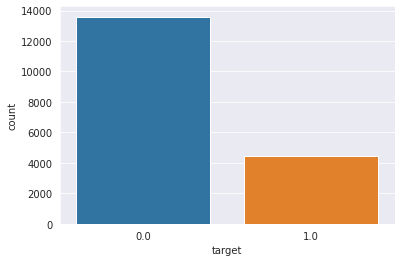

In [178]:
sns.countplot(df['target'])

data is imblanced.

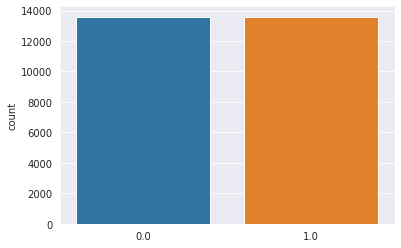

In [179]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 402)
X_smote, Y_smote = smote.fit_resample(X,Y)
sns.countplot(Y_smote)

In [180]:
X_train, X_test, Y_train, Y_test = train_test_split(X_smote, Y_smote, test_size = 0.2 ,random_state = 42)

standard scaler

In [181]:
scaler=StandardScaler()
scaler.fit(X_train)
#scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

**KNN CLASSIFIER**

In [182]:
#predicting using the KNeighbors_Classifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), 
                               metric='minkowski')
#euclidean,manhattan,minkowski
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.

In [183]:
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[2104  652]
 [ 731 1951]]

Classification report: 
              precision    recall  f1-score   support

         0.0       0.74      0.76      0.75      2756
         1.0       0.75      0.73      0.74      2682

    accuracy                           0.75      5438
   macro avg       0.75      0.75      0.75      5438
weighted avg       0.75      0.75      0.75      5438

Accuracy of the model:  0.7456785582934903


we will try to improve accuracy

In [184]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,30):
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="euclidean")
    model_KNN.fit(X_train, Y_train) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K)
    my_dict[K]=accuracy_score(Y_test,Y_pred)

Accuracy is  0.8148216255976461 for K-Value: 1
Accuracy is  0.7795145273997793 for K-Value: 2
Accuracy is  0.7888929753585877 for K-Value: 3
Accuracy is  0.7721588819418904 for K-Value: 4
Accuracy is  0.7763883780801766 for K-Value: 5
Accuracy is  0.768481059212946 for K-Value: 6
Accuracy is  0.7751011401250459 for K-Value: 7
Accuracy is  0.7705038617138654 for K-Value: 8
Accuracy is  0.7767561603530709 for K-Value: 9
Accuracy is  0.7670099301213682 for K-Value: 10
Accuracy is  0.7697682971680765 for K-Value: 11
Accuracy is  0.7690327326222876 for K-Value: 12
Accuracy is  0.7682971680764987 for K-Value: 13
Accuracy is  0.7703199705774182 for K-Value: 14
Accuracy is  0.7716072085325487 for K-Value: 15
Accuracy is  0.7699521883045237 for K-Value: 16
Accuracy is  0.7695844060316293 for K-Value: 17
Accuracy is  0.7699521883045237 for K-Value: 18
Accuracy is  0.7695844060316293 for K-Value: 19
Accuracy is  0.7699521883045237 for K-Value: 20
Accuracy is  0.7712394262596542 for K-Value: 21
Ac

In [185]:
my_dict

{1: 0.8148216255976461,
 2: 0.7795145273997793,
 3: 0.7888929753585877,
 4: 0.7721588819418904,
 5: 0.7763883780801766,
 6: 0.768481059212946,
 7: 0.7751011401250459,
 8: 0.7705038617138654,
 9: 0.7767561603530709,
 10: 0.7670099301213682,
 11: 0.7697682971680765,
 12: 0.7690327326222876,
 13: 0.7682971680764987,
 14: 0.7703199705774182,
 15: 0.7716072085325487,
 16: 0.7699521883045237,
 17: 0.7695844060316293,
 18: 0.7699521883045237,
 19: 0.7695844060316293,
 20: 0.7699521883045237,
 21: 0.7712394262596542,
 22: 0.7705038617138654,
 23: 0.7697682971680765,
 24: 0.7692166237587348,
 25: 0.7671938212578153,
 26: 0.7649871276204487,
 27: 0.7666421478484737,
 28: 0.7666421478484737,
 29: 0.7653549098933431}

In [186]:
for k in my_dict:
    if my_dict[k]==max(my_dict.values()):
        print("KNN CLASSIFIER MAX ACCURACY IS : ",k,":",my_dict[k])

KNN CLASSIFIER MAX ACCURACY IS :  1 : 0.8148216255976461


**LOGISTIC REGRESSION**

In [187]:
log_reg=sm.Logit(Y_smote, X_smote).fit()

Optimization terminated successfully.
         Current function value: 0.578978
         Iterations 6


In [188]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                27186
Model:                          Logit   Df Residuals:                    27156
Method:                           MLE   Df Model:                           29
Date:                Sat, 24 Apr 2021   Pseudo R-squ.:                  0.1647
Time:                        02:32:33   Log-Likelihood:                -15740.
converged:                       True   LL-Null:                       -18844.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -5.0071      0.115    -43.542      0.000      -5.233      -4.782
x2            -0.0223      0.003     -8.420      0.000      -0.027      -0.017
x3             0.0446      0.010      4.531      0.0

In [189]:
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (0.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 1.0), (1.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (1.0, 0.0), (0.0, 0.0), (0.

In [190]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

confusion_matrix=confusion_matrix(Y_test,Y_pred)
print(confusion_matrix)
print()
print("Classification report: ")

print(classification_report(Y_test,Y_pred))

accuracy_score=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",accuracy_score)

[[2042  714]
 [ 776 1906]]

Classification report: 
              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73      2756
         1.0       0.73      0.71      0.72      2682

    accuracy                           0.73      5438
   macro avg       0.73      0.73      0.73      5438
weighted avg       0.73      0.73      0.73      5438

Accuracy of the model:  0.7260022066936374


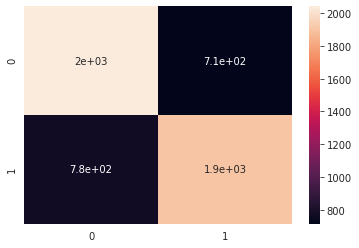

In [191]:
sns.heatmap(confusion_matrix, annot=True)

**Decision Trees**

In [192]:
#predicting using the Decision_Tree_Classifier
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10,splitter="best")
#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

[1. 1. 0. ... 1. 1. 0.]


In [193]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[2182  574]
 [ 513 2169]]
0.8001103346818683
              precision    recall  f1-score   support

         0.0       0.81      0.79      0.80      2756
         1.0       0.79      0.81      0.80      2682

    accuracy                           0.80      5438
   macro avg       0.80      0.80      0.80      5438
weighted avg       0.80      0.80      0.80      5438



In [194]:
model_DecisionTree.score(X_train,Y_train)

0.9982067316534854

**Random_Forest_Classifier**

In [197]:
#predicting using the Random_Forest_Classifier
model_RandomForest=RandomForestClassifier(n_estimators=50, random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)

In [196]:
#confusion matrix
print(confusion_matrix(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))

[[2411  345]
 [ 510 2172]]
0.8427730783376242
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85      2756
         1.0       0.86      0.81      0.84      2682

    accuracy                           0.84      5438
   macro avg       0.84      0.84      0.84      5438
weighted avg       0.84      0.84      0.84      5438



Random forrest accuracy is 82.83